In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
arch=resnext50

# Checking solution where training set = test set(Just checking!!!)

In [5]:
PATH = "final_data1/user15/"
sz=1080
print(sz)
sz_y=1920
print(sz_y)

1080
1920


In [6]:
tfms = tfms_from_model(arch, sz=sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name="train", val_name="train", bs =10)
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      1.004236   153.17205  0.608696  



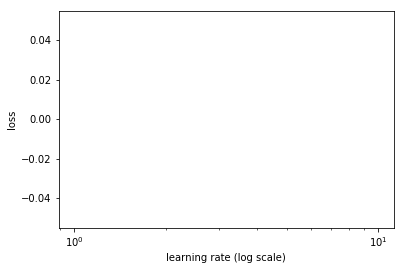

In [7]:
lrf=learn.lr_find()
learn.sched.plot()

In [8]:
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.707492   0.746764   0.623188  
    1      0.533822   0.819914   0.695652        
    2      0.504909   0.384893   0.797101        
    3      0.438332   0.116219   0.971014        
    4      0.385445   0.073741   1.0             



[array([0.07374]), 1.0]

In [9]:
learn.fit(0.001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      0.147167   0.066688   1.0       
    1      0.184784   0.056763   1.0             
    2      0.162315   0.03857    1.0             
    3      0.20904    0.035002   1.0             
    4      0.189607   0.028405   1.0             



[array([0.02841]), 1.0]

In [10]:
log_preds,y = learn.TTA(n_aug=1)
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

1.0

[[27  0]
 [ 0 42]]


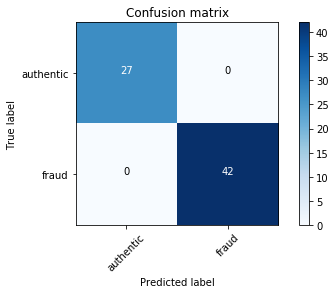

In [11]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

# Real Deal!

In [64]:
PATH = "final_data3/user15/"
sz=1080
print(sz)
sz_y=1920
print(sz_y)

1080
1920


In [65]:
tfms = tfms_from_model(arch, sz=sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name="train", val_name="test", bs =9)
learn = ConvLearner.pretrained(arch, data, precompute=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      1.438384   123.246476 0.521739  



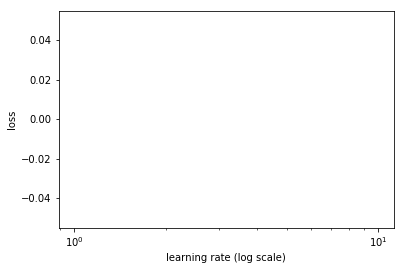

In [66]:
lrf=learn.lr_find()
learn.sched.plot()

In [68]:
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.126432   1.112389   0.717391  
    1      0.196421   1.034136   0.73913         
    2      0.249422   0.842273   0.717391        
    3      0.250152   0.933216   0.76087         
    4      0.251226   1.006557   0.717391        



[array([1.00656]), 0.7173913140659747]

In [69]:
learn.fit(0.01, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy          
    0      0.399135   0.781451   0.826087  



[array([0.78145]), 0.8260869610568752]

In [60]:
learn.fit(0.001, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy          
    0      0.384906   0.64651    0.76087   
    1      0.339427   0.690283   0.717391         
    2      0.326754   0.667689   0.717391         
    3      0.365416   0.64323    0.695652         
    4      0.367336   0.694747   0.717391         



[array([0.69475]), 0.7173913186011107]

In [61]:
learn.fit(0.01, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy          
    0      0.399291   0.742392   0.673913  
    1      0.393304   0.707844   0.695652         
    2      0.413842   0.554097   0.76087          
    3      0.449875   0.538606   0.76087          
    4      0.477134   0.826948   0.73913          
    5      0.618724   0.570971   0.73913          
    6      0.58898    0.667653   0.652174         
    7      0.522286   0.742481   0.717391         
    8      0.478437   0.885877   0.673913         
    9      0.43353    0.61688    0.717391         
    10     0.418003   0.703512   0.695652         
    11     0.386152   0.646172   0.73913          
    12     0.37062    0.651019   0.73913          



[array([0.65102]), 0.7391304477401401]

In [62]:
learn.fit(0.001, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy         
    0      0.316999   0.61924    0.76087   
    1      0.368813   0.624271   0.73913          
    2      0.336792   0.610318   0.76087          
    3      0.342619   0.611087   0.73913          
    4      0.375913   0.605347   0.717391         
    5      0.31931    0.594882   0.717391         
    6      0.279429   0.638858   0.695652         
    7      0.236512   0.581063   0.695652         
    8      0.20157    0.568141   0.76087          
    9      0.189801   0.622367   0.73913          
    10     0.200106   0.597263   0.717391         
    11     0.194941   0.575151   0.717391         
    12     0.211466   0.575503   0.73913          



[array([0.5755]), 0.7391304477401401]

In [63]:
learn.fit(0.0001, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy          
    0      0.134516   0.579132   0.73913   
    1      0.149871   0.580832   0.717391         
    2      0.189879   0.627656   0.76087          
    3      0.163469   0.61548    0.76087          
    4      0.182941   0.597739   0.717391         
    5      0.162494   0.588625   0.76087          
    6      0.167824   0.595901   0.73913          
    7      0.173403   0.58353    0.73913          
    8      0.182923   0.587613   0.73913          
    9      0.2102     0.617751   0.73913          
    10     0.199584   0.574587   0.73913          
    11     0.217449   0.592172   0.717391         
    12     0.241264   0.602197   0.717391         



[array([0.6022]), 0.7173913140659747]

In [12]:
# learn.unfreeze()
# lr = 0.001
# lrs=np.array([lr/100,lr/10,lr])
# learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

In [70]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.8260869565217391

[[12  6]
 [ 2 26]]


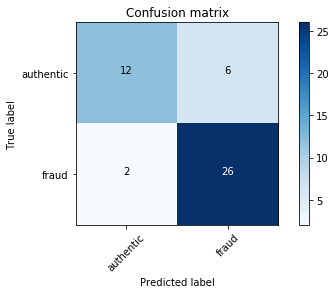

In [71]:
preds = np.argmax(probs, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

In [72]:
def accuracy_new(preds, targs, thres=0.5):
    preds = [int(x[1] > thres) for x in preds]
    return (preds==targs).mean()

In [73]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
for cut in [0.4, 0.6, 0.65, 0.7]:
    print(accuracy_new(probs, y, cut))

0.8260869565217391                   
0.8478260869565217
0.8478260869565217
0.8260869565217391


[[13  5]
 [ 2 26]]


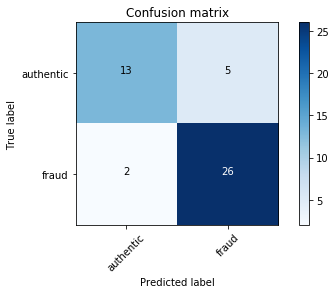

In [74]:
preds = [int(x[1] > 0.6) for x in probs]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)